In [74]:
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


In [115]:
data = pd.read_csv('train_data.csv')
len(data)


28624

In [116]:
x_train = data[['order_freight_value', 'product_description_lenght', 'product_photos_qty', 'delta_days', 'pos_prob', 'neg_prob', 'neu_prob','customer_state_AC',
       'customer_state_AL', 'customer_state_AM', 'customer_state_AP',
       'customer_state_BA', 'customer_state_CE', 'customer_state_DF',
       'customer_state_ES', 'customer_state_GO', 'customer_state_MA',
       'customer_state_MG', 'customer_state_MS', 'customer_state_MT',
       'customer_state_PA', 'customer_state_PB', 'customer_state_PE',
       'customer_state_PI', 'customer_state_PR', 'customer_state_RJ',
       'customer_state_RN', 'customer_state_RO', 'customer_state_RR',
       'customer_state_RS', 'customer_state_SC', 'customer_state_SE',
       'customer_state_SP', 'customer_state_TO']]
y_train = data['review_score']

In [117]:
regr = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=0)
regr.fit(x_train,y_train)
regr.feature_importances_

array([4.57079364e-02, 4.75199641e-02, 1.49803451e-02, 3.99234093e-02,
       8.12642295e-02, 6.78935101e-01, 5.66149891e-02, 1.30615765e-04,
       4.73100743e-04, 3.02530818e-04, 7.69573558e-05, 2.16013481e-03,
       1.09801858e-03, 1.54756953e-03, 1.44067016e-03, 1.68533046e-03,
       7.81268671e-04, 3.91783831e-03, 8.81042419e-04, 9.10079764e-04,
       1.06358304e-03, 6.09372567e-04, 1.32235344e-03, 2.51249552e-04,
       2.03953670e-03, 3.80422426e-03, 4.85504153e-04, 5.39297909e-04,
       1.00668450e-04, 2.32310020e-03, 2.00072852e-03, 2.59927408e-04,
       4.28711616e-03, 5.62205386e-04])

In [118]:
test_data = pd.read_csv('test_data.csv')
len(test_data)

12268

In [119]:
x_test = test_data[['order_freight_value', 'product_description_lenght', 'product_photos_qty', 'delta_days', 'pos_prob', 'neg_prob', 'neu_prob', 'customer_state_AC',
       'customer_state_AL', 'customer_state_AM', 'customer_state_AP',
       'customer_state_BA', 'customer_state_CE', 'customer_state_DF',
       'customer_state_ES', 'customer_state_GO', 'customer_state_MA',
       'customer_state_MG', 'customer_state_MS', 'customer_state_MT',
       'customer_state_PA', 'customer_state_PB', 'customer_state_PE',
       'customer_state_PI', 'customer_state_PR', 'customer_state_RJ',
       'customer_state_RN', 'customer_state_RO', 'customer_state_RR',
       'customer_state_RS', 'customer_state_SC', 'customer_state_SE',
       'customer_state_SP', 'customer_state_TO']]
y_test = test_data['review_score']

In [120]:
predictions = (regr.predict(x_test))

In [121]:
test_data['Prediction'] = predictions
test_data.head()

,Unnamed: 0,order_products_value,order_freight_value,product_description_lenght,product_photos_qty,review_score,review_comment_message,delta_days,Classificacao,customer_state_AC,...,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,pos_prob,neg_prob,neu_prob,Prediction
0,13020,49.00,17.65,348,2,1,demora demais para entrega do produto,23.0,-1,0,...,0,0,0,0,0,0,0.802357,0.152163,0.045480,1.86
1,60824,890.00,116.87,543,1,5,produto recebido no prazo e em perfeitas condi...,19.0,1,0,...,0,1,0,0,0,0,0.999416,0.000187,0.000397,4.64
2,8239,129.00,12.32,617,3,4,houve um pouco de demora mas deu tudo certo ob...,17.0,1,0,...,0,0,0,0,1,0,0.933255,0.000794,0.065951,3.39
3,13247,117.99,9.64,916,1,5,obrigado eu recomendo baratheon,4.0,1,0,...,0,0,0,0,1,0,0.991217,0.006855,0.001928,4.56
4,64389,179.40,53.01,1991,2,5,lindo o papel de parede,14.0,1,0,...,0,0,0,0,0,0,0.970413,0.008010,0.021576,4.55


In [122]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [123]:
1 - mean_squared_error(y_test, predictions) / np.var(y_test)

0.6538137841634717

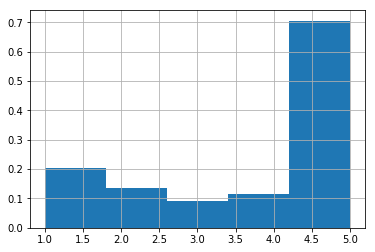

In [124]:
test_data['Prediction'].hist(bins=5, density=True)

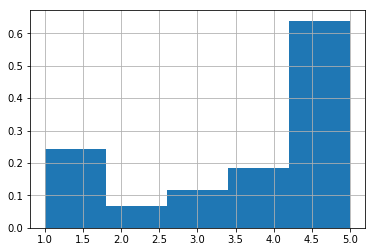

In [133]:
test_data['review_score'].hist(bins=5, density=True)

In [134]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [141]:
cc = confusion_matrix(test_data['review_score'], test_data['Prediction'])
confusion_matrix(test_data['review_score'], test_data['Prediction'])
plt.figure(figsize=(8, 8))

plt.imshow(cc, cmap=plt.cm.YlOrBr);

# # tick_marks = np.arange(34)
# # plt.xticks(tick_marks, classes, rotation=90)
# # plt.yticks(tick_marks, classes

plt.ylabel('True label')
plt.xlabel('Predicted label')

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [142]:
np.sqrt(mean_squared_error(y_test, predictions))



0.9294270414132578